# Predict Restaurant Ratings | By: Gurmehar Singh

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df = pd.read_csv('/kaggle/input/t1-data/Dataset .csv')
print("Columns/Attributes in the dataset:")
print(df.columns)
print("Shape of the dataset:", df.shape)

Columns/Attributes in the dataset:
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
Shape of the dataset: (9551, 21)


In [105]:
df.sample(5).style.set_properties(**{
    'background-color': 'blue',
    'color': 'white',
    'border-color': 'darkblack' 
})

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
3956,18418258,The Junction,1,New Delhi,"CSC Complex, Opposite Aurobindo Market, Hauz Khas, New Delhi",Hauz Khas,"Hauz Khas, New Delhi",77.205931,28.554397,"North Indian, Continental, Asian, Italian",1200,Indian Rupees(Rs.),Yes,No,No,No,3,3.900000,Yellow,Good,93
2633,312300,Peninsular Kitchen,1,New Delhi,"Level 3, Ambience Mall, Vasant Kunj, New Delhi","Ambience Mall, Vasant Kunj","Ambience Mall, Vasant Kunj, New Delhi",77.155095,28.541141,"Seafood, South Indian, Andhra, Hyderabadi, Goan",1500,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.200000,Green,Very Good,336
655,18335583,Brick Kitchen,1,Ahmedabad,"At Five Petals Hotel & Banquets, Near Chanakyapuri Bridge, Ghatlodia, Ahmedabad",Ghatlodia,"Ghatlodia, Ahmedabad",72.531639,23.064304,"North Indian, Chinese, Continental",900,Indian Rupees(Rs.),No,No,No,No,3,4.300000,Green,Very Good,325
4912,305948,Chandni Chowk Parantha Corner,1,New Delhi,"10, Latika Park, Laxmi Nagar, New Delhi",Laxmi Nagar,"Laxmi Nagar, New Delhi",77.277325,28.631234,North Indian,100,Indian Rupees(Rs.),No,No,No,No,1,3.100000,Orange,Average,8
2114,18403465,Tandoor Express,1,Gurgaon,"B-215, Supermart 1, DLF Phase 4, Gurgaon","Supermart 1, DLF Phase 4","Supermart 1, DLF Phase 4, Gurgaon",77.087423,28.462493,North Indian,500,Indian Rupees(Rs.),No,Yes,No,No,2,4.200000,Green,Very Good,67


In [106]:
print("Checking for any null values in the dataset:")
print(df.isnull().any())
print("\nCount of null values:")
print(df.isnull().sum())

Checking for any null values in the dataset:
Restaurant ID           False
Restaurant Name         False
Country Code            False
City                    False
Address                 False
Locality                False
Locality Verbose        False
Longitude               False
Latitude                False
Cuisines                 True
Average Cost for two    False
Currency                False
Has Table booking       False
Has Online delivery     False
Is delivering now       False
Switch to order menu    False
Price range             False
Aggregate rating        False
Rating color            False
Rating text             False
Votes                   False
dtype: bool

Count of null values:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Curr

In [107]:
df.describe().style.set_properties(**{
    'background-color': 'blue',
    'color': 'white'
})

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9051128.349178,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8791521.282104,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,53.000000,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,301962.500000,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6004089.000000,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,18352291.500000,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,18500652.000000,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [108]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

(array([0.45897534, 0.        , 0.        , 0.00064103, 0.03910265,
        0.26645356, 0.53205242, 0.44871891, 0.23055605, 0.06431638]),
 array([0.  , 0.49, 0.98, 1.47, 1.96, 2.45, 2.94, 3.43, 3.92, 4.41, 4.9 ]),
 [<matplotlib.patches.Polygon at 0x7f823b9e66b0>])

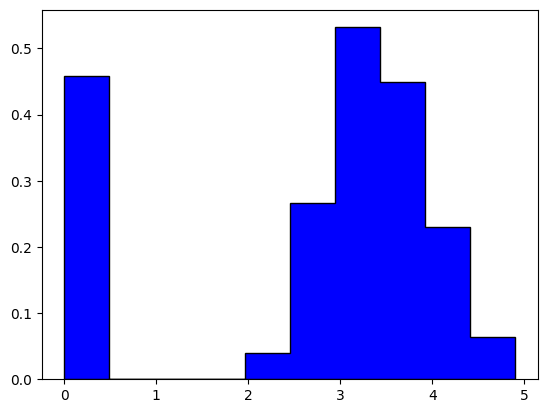

In [109]:
plt.hist(df['Aggregate rating'], density=True, histtype='stepfilled', color='blue', edgecolor='black')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price range', ylabel='Density'>

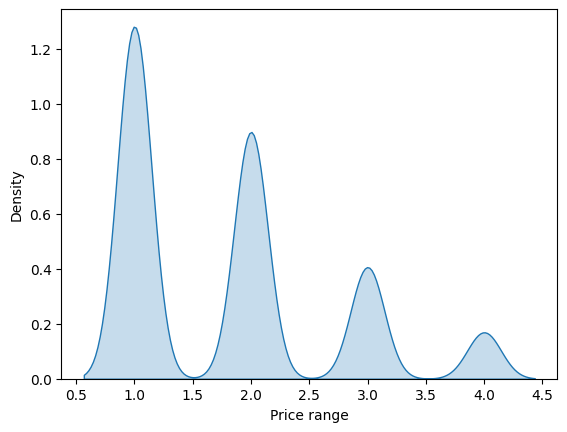

In [110]:
sns.kdeplot(data=df['Price range'], fill=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

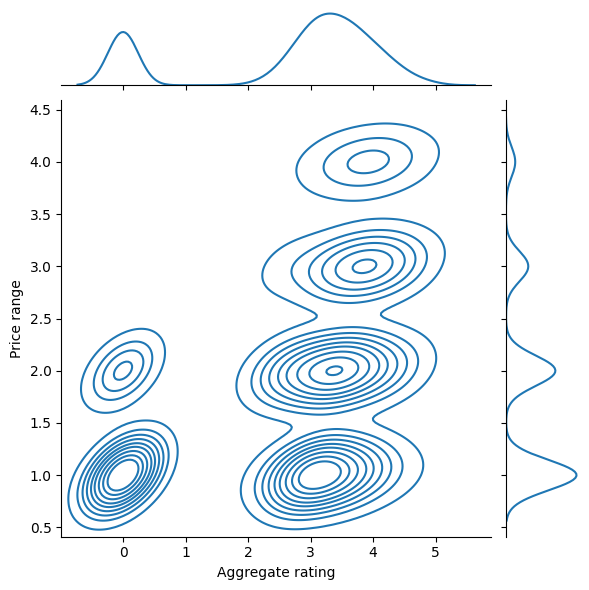

In [111]:
sns.jointplot(x='Aggregate rating', y='Price range', data=df, kind='kde', fill=False)

<Axes: >

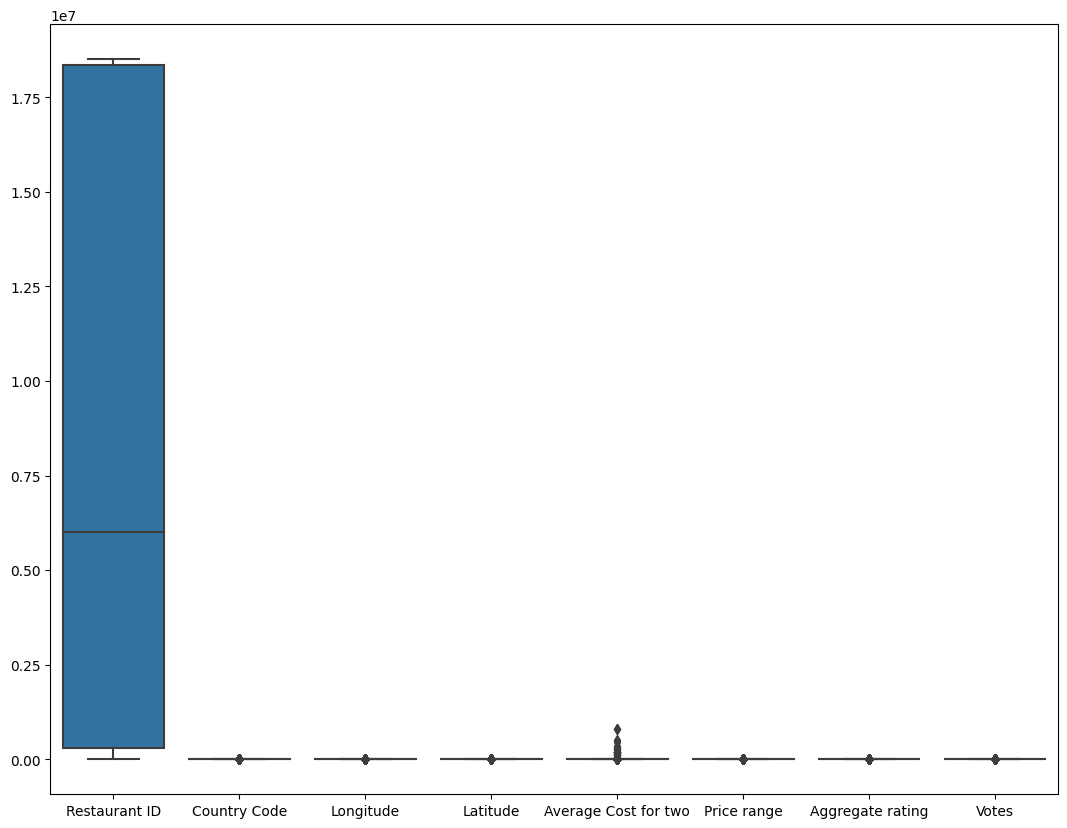

In [112]:
fig1 = plt.figure(figsize = (13, 10))
sns.boxplot(df, width=0.8)

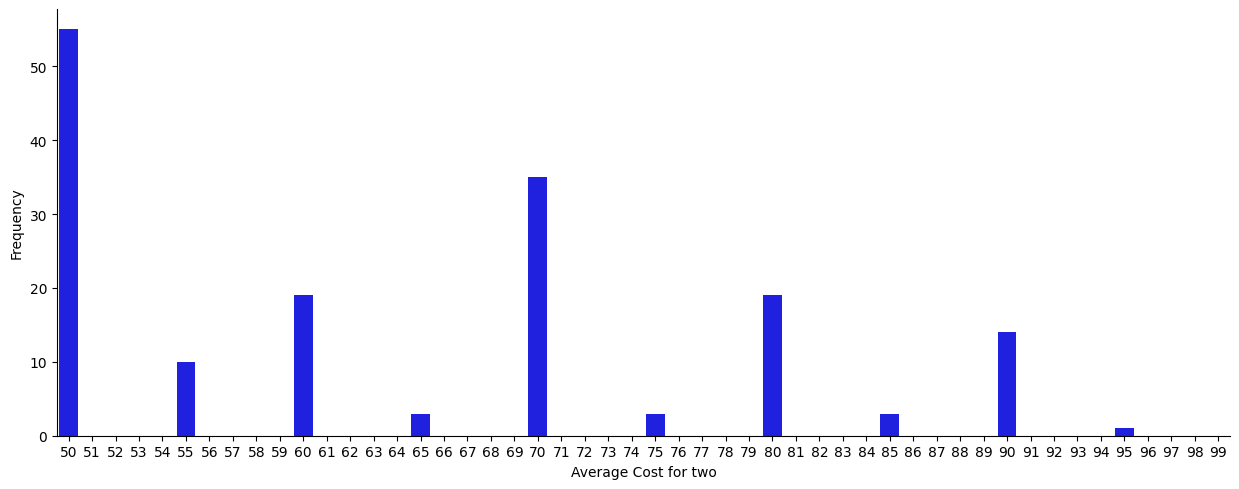

In [113]:
plot = sns.catplot(x='Average Cost for two', data=df, aspect=2.5,kind='count', color='blue', order=range(50, 100))
plot.set_ylabels('Frequency')

In [114]:
# Drop null values
df.dropna(subset='Cuisines', inplace=True)
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [115]:
###### df2 = pd.get_dummies(df, columns=['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text'])
from sklearn.preprocessing import OneHotEncoder

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)
print(df_encoded.columns)
print(df_encoded.isnull().sum())

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes',
       'Restaurant Name_#45', 'Restaurant Name_#Dilliwaala6',
       ...
       'Rating color_Orange', 'Rating color_Red', 'Rating color_White',
       'Rating color_Yellow', 'Rating text_Average', 'Rating text_Excellent',
       'Rating text_Good', 'Rating text_Not rated', 'Rating text_Poor',
       'Rating text_Very Good'],
      dtype='object', length=20820)
Restaurant ID            9
Country Code             9
Longitude                9
Latitude                 9
Average Cost for two     9
                        ..
Rating text_Excellent    9
Rating text_Good         9
Rating text_Not rated    9
Rating text_Poor         9
Rating text_Very Good    9
Length: 20820, dtype: int64


In [116]:
df_encoded.dropna(inplace=True)
print(df_encoded.isnull().sum())
print(df_encoded.shape)

Restaurant ID            0
Country Code             0
Longitude                0
Latitude                 0
Average Cost for two     0
                        ..
Rating text_Excellent    0
Rating text_Good         0
Rating text_Not rated    0
Rating text_Poor         0
Rating text_Very Good    0
Length: 20820, dtype: int64
(9533, 20820)


In [117]:
all_columns = list(range(df_encoded.shape[1]))
column_to_exclude = 6
columns_to_include = [col_idx for col_idx in all_columns if col_idx != column_to_exclude]

X = df_encoded.iloc[:, columns_to_include].values
y = df_encoded.iloc[:, 6].values
pd.DataFrame(X).isnull().sum()

0        0
1        0
2        0
3        0
4        0
        ..
20814    0
20815    0
20816    0
20817    0
20818    0
Length: 20819, dtype: int64

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [134]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

SVR()

In [135]:
y_pred = regressor.predict(X_test)

In [136]:
print(y_pred, y_test)

[3.25117767 3.24044853 3.19965547 ... 2.86055023 2.72985064 3.19869965] [3.6 3.3 2.9 ... 3.2 0.  3.6]


In [137]:
from sklearn.metrics import r2_score

predictions = regressor.predict(X_test) 
r_squared = r2_score(y_test, y_pred)
print("R-squared score:", r_squared)

R-squared score: 0.08436456013186766
